## Aula de Data Science: Arvores de Decisao

### Observacao: partes de um Notebook
### 1 - Importar Bibliotecas
### 2 - Definir Funcoes
### 3 - Importar Dados
### 4 - Processar Dados
### 5 - Mostrar Resultados

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## TEORIA: Regressao ou Classificacao com ÁRVORE DE DECISÃO 
 

Definição: "Uma Árvore de Decisão é um modelo de representação de conhecimento em que cada nó interno representa uma decisão sobre um atributo que determina como os dados estão particionados pelos seus nós filhos". (Goldschmidt, 2016)

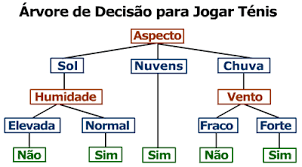

Em geral a construção de uma Árvore de Decisão é realizada de acordo com alguma regra recursiva de particionamento (separação) dos dados. Inicialmente, a raiz da árvore contém todo o conjunto de observações com diversas classes (diabético/não diabético, adimplente/inadimplente). 

A partir daí, um predicado, denominado ponto de separação, é escolhido como sendo a condição que melhor separa as classes. Um predicado envolve uma das características previsoras do problema e induz uma divisão do conjunto de dados em dois ou mais conjuntos mutualmente exclusivos. Cada novo nó, portanto, é um subconjunto do conjunto de dados que é recursivamente separado até que o subconjunto associado a cada nó folha consista em registros de uma mesma classe assim como a imagem representado na imagem acima. (Goldschimidt, 2016)

Para a construção de uma Árvore de Decisão existem duas operações fundamentais nessa etapa. 

- Avaliação dos pontos de separação em potencial para identificação de qual o melhor entre eles;
- Criação das partições usando o melhor ponto de separação;

## =====================================================================================================================

### Importacao de bibliotecas de funcoes

In [101]:
! pip install graphviz 
! pip install pydotplus

In [117]:
import matplotlib.pylab as plz
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore') 

import graphviz
import os
import io
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from io import StringIO

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, precision_recall_curve

sns.set()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [67]:
from sklearn import tree

### Definicao de Funcoes

In [69]:
# Funcao de Matrix de Confusao
def CMatrix(CM,labels =['Diabético','Não Diabético']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='Real'
    df.columns.name = 'Previsto'
    df.loc['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df 

### Parametros para figuras

In [71]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

### Leitura de arquivo com dados sobre diabeters (registros de exames medicos)

In [73]:
diabete = pd.read_csv("diabetes.csv") # arquivo diabetes.csv possui resultados compilados de exames médicos

In [74]:
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
diabete.shape

(768, 9)

### Matriz de Correlacao: como uma variavel consegue explicar o comportamento de uma outra

<Axes: >

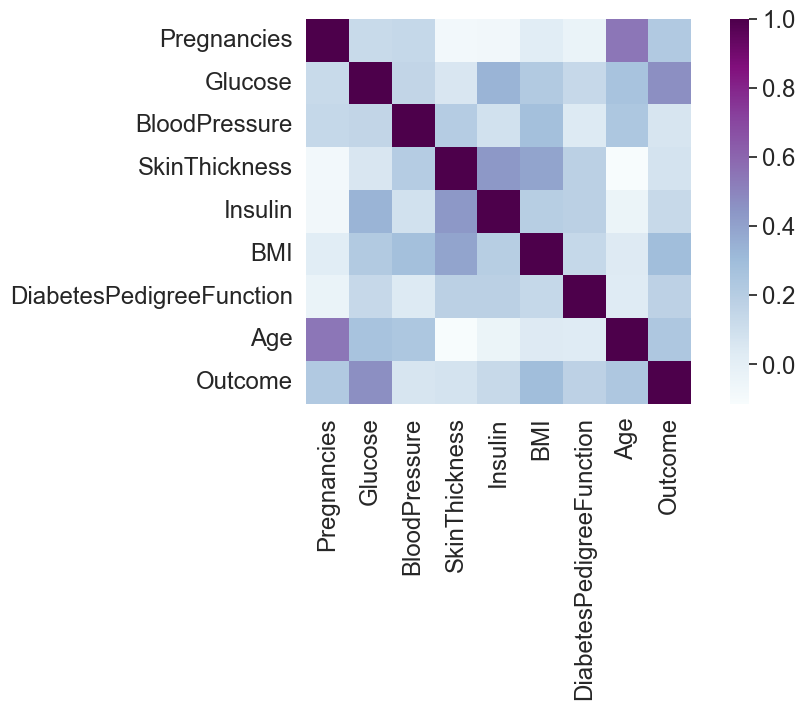

In [77]:
corrmat = diabete.corr()
sns.heatmap(corrmat, square=True, cmap="BuPu")

In [78]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
diabete.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Figuras sobre os dados

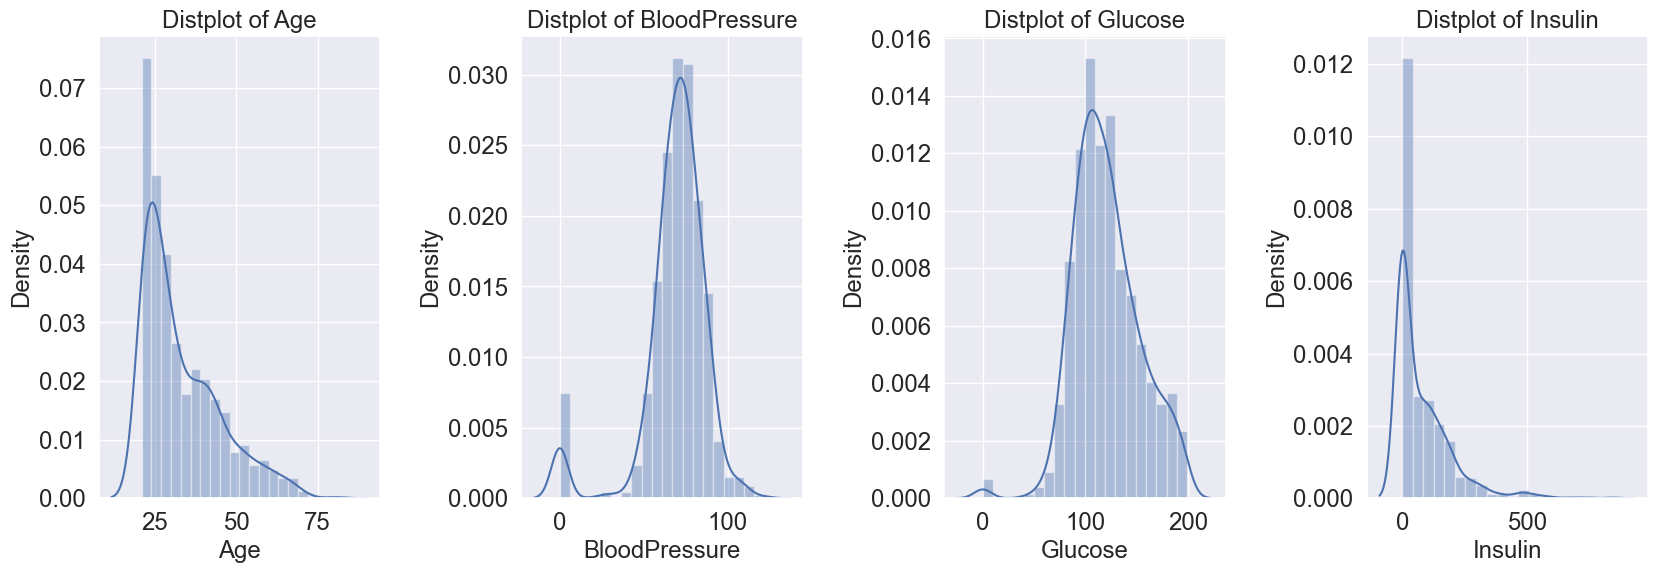

In [81]:
plt.figure(1 , figsize = (20 , 6))
n = 0 
for x in ['Age' , 'BloodPressure' ,'Glucose','Insulin']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(diabete[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [82]:
diabete = diabete[diabete.BloodPressure>=10] # Separacao de casos com pressao sanguinea acima de 10

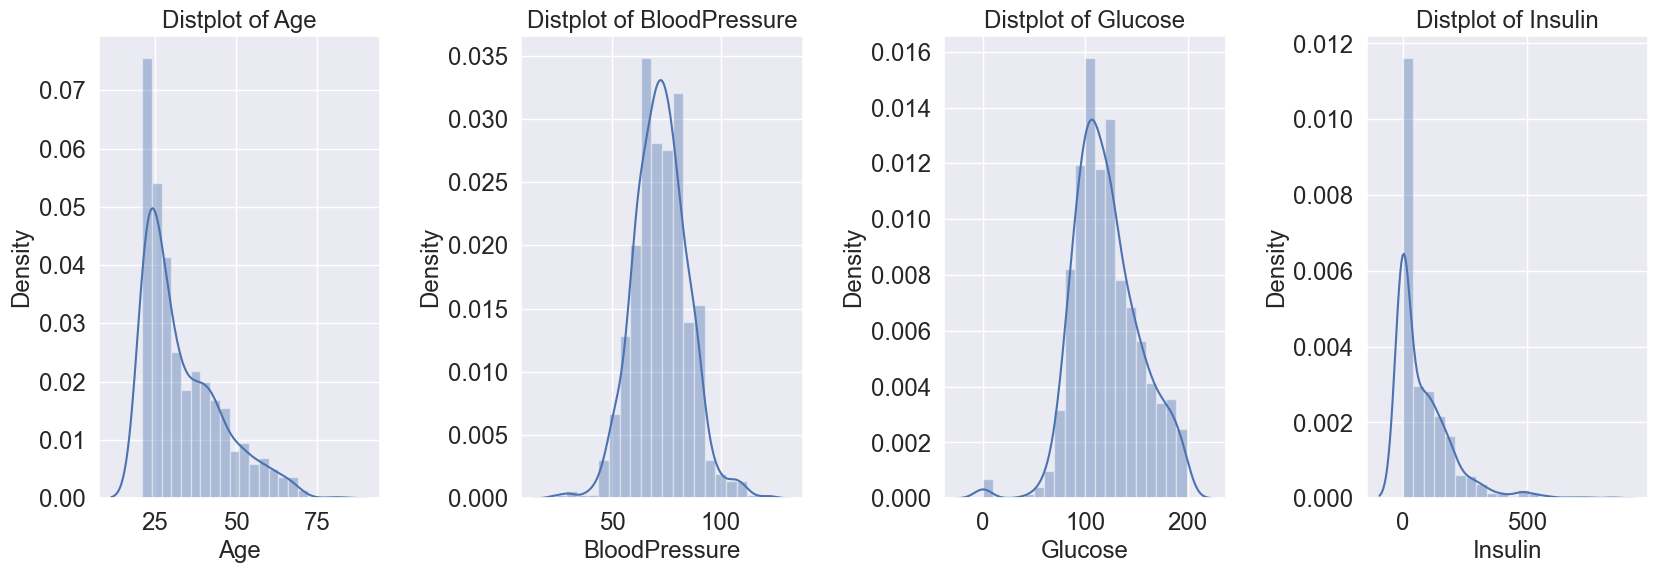

In [83]:
# Nova figura depois da separacao
plt.figure(1 , figsize = (20 , 6))
n = 0 
for x in ['Age' , 'BloodPressure' ,'Glucose','Insulin']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(diabete[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [84]:
# Separacao dos arquivos com entradas e saida
X = diabete.iloc[:,0:8] # arquivo com variaveis de entrada
y = diabete.iloc[:,8] # arquivo com variavel de saida

In [85]:
y.shape

(733,)

In [86]:
y.unique()

array([1, 0], dtype=int64)

In [87]:
y = le.fit_transform(y) # transformacao de dados de saida para array de numeros
y = np.ravel(y)
y.shape

(733,)

In [88]:
# Algoritmo de Machine Learning com Supervisao - separacao entre treino e test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=123,stratify=y)

In [89]:
y_train.shape

(513,)

In [90]:
# Aplicacao do Algoritmo de Arvore de Decisao
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, max_depth=10, class_weight="balanced")
clf = clf.fit(X_train, y_train)

y_pred_test_tree= clf.predict(X_test)

# Metricas do desempenho do algoritmo de Arvore de Decisao
acuracia_tree = accuracy_score(y_pred=y_pred_test_tree,y_true=y_test)
precisao_tree = precision_score(y_pred=y_pred_test_tree,y_true=y_test)
recall_tree = recall_score(y_pred=y_pred_test_tree,y_true=y_test)

# Matriz de Confusao
CM= confusion_matrix(y_pred=y_pred_test_tree,y_true=y_test)
CMatrix(CM).T

Real,Diabético,Não Diabético,Total
Previsto,,,
Diabético,111,29,140
Não Diabético,33,47,80
Total,144,76,220


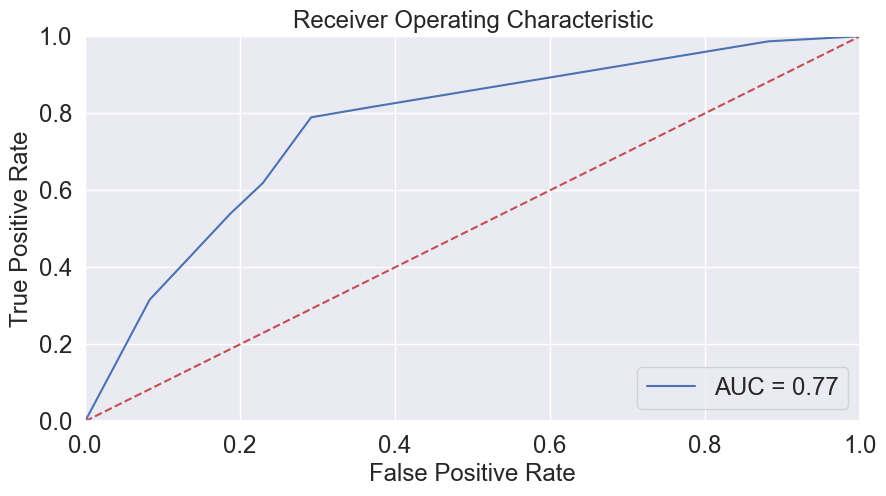

In [91]:
# Calculo de Probabilidades
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr_clf, tpr_clf, threshold = metrics.roc_curve(y_test, preds)
roc_auc_clf = metrics.auc(fpr_clf, tpr_clf)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_clf, tpr_clf, 'b', label = 'AUC = %0.2f' % roc_auc_clf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
a = acuracia_tree
b = precisao_tree
c = recall_tree

print(round(a,3), round(b,3), round(c,3))

0.718 0.588 0.618


### Imagem com a Árvore de Decisao

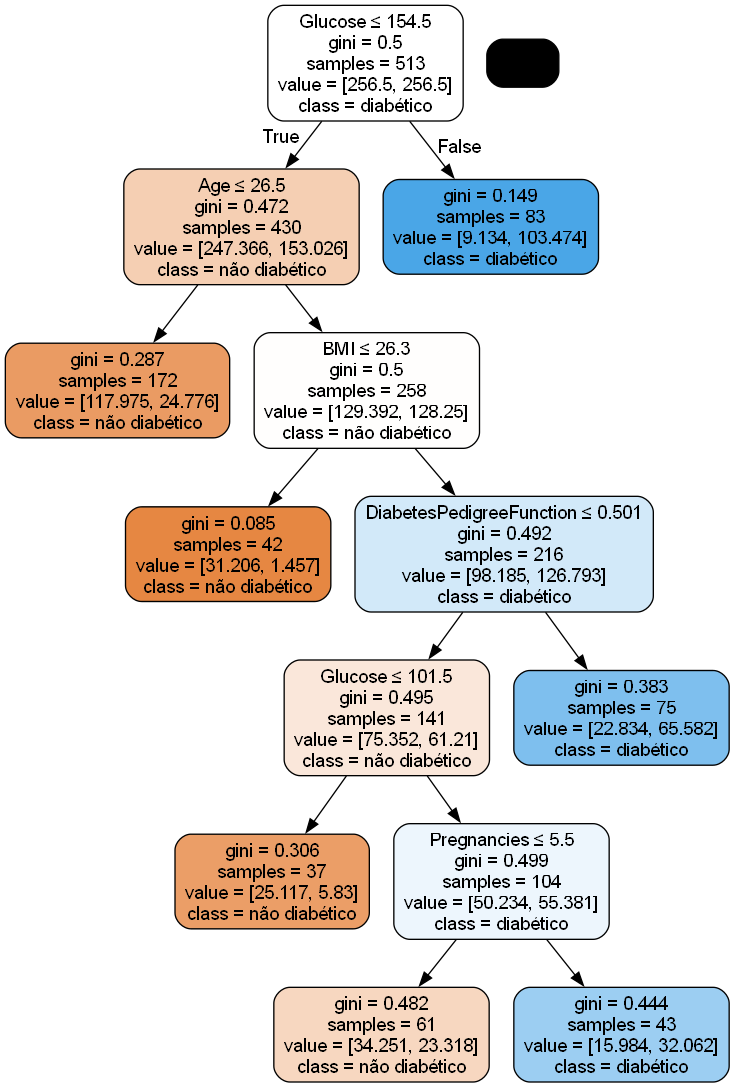

In [119]:
dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                class_names=['não diabético','diabético'],
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=list(X))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Predicao de um caso, contendo dados de exames medicos

In [122]:
from collections import OrderedDict 
# criamos um dicionário, para características específicas, para que o modelo nos diga o preço estimado.
# nas variáveis categóricas, somente um campo deverá estar preenchido, os demais serão = 0.0
diag_diab= OrderedDict([('Pregnancies',1),('Glucose',289),('BloodPressure',96),
                          ('SkinThickness',23),('Insulin',94),('BMI',28.1),
                          ('DiabetesPedigreeFunction',0.167),('Age',21)])

diag_diab= pd.Series(diag_diab).values.reshape(1,-1)

In [124]:
clf.predict(diag_diab)

array([1])